In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from implementations import * 
from proj1_helpers import *
%load_ext autoreload
%autoreload 2

In [8]:
# import some data to test the functions
from helpers import *

ids_tr,predictions_tr,data_tr, ids_te,data_te = load_boson_data()

y = predictions_tr

x, mean_x, std_x = standardize(data_tr)

y,tx = build_model_data(x,y)

y.shape, x.shape, tx.shape, data_tr.shape

((99,), (99, 30), (99, 31), (99, 30))

In [ ]:
# gradient descent
initial_w = np.zeros(tx.shape[1])
max_iters = 20
gamma = 0.1
loss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, print_output=False, plot_losses=True)
loss,w

In [ ]:
# stochastic gradient descent
# gradient descent
initial_w = np.array([0, 0])
max_iters = 20
gamma = 0.5
loss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, batch_size=1, print_output=False, plot_losses=True)
loss,w

In [ ]:
# analityc solution
least_squares(y, tx)

In [ ]:
# ridge regression to choose smaller weights (the simpler the model the better)
lambda_ = 0.02 # how to properly choose lambda?
ridge_regression(y, tx, lambda_)

In [ ]:
# logistic regression (it is gradient descent with a different loss function)
from helpers import sample_data, load_data
from plots import visualization

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

tx = build_poly(x, 1)
initial_w = np.ones(tx.shape[1])
max_iters = 50
gamma = 0.2
minloss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, batch_size=-1, print_output=False, plot_losses=True, costfunc=CostFunction.PROB)
# w = np.array(w).reshape(-1, 1)
visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
minloss, w

In [ ]:
tes_std, _, _ = standardize(data_te)
tx_std =  build_poly(tes_std, 1)

print(tx_std.shape)
predict_labels(w, tx_std)

## Cross validation example (with ridge regression)

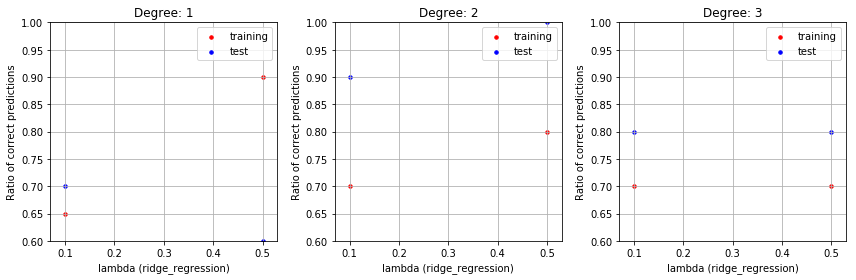

In [53]:
# just show how the function cross_validation_visualization works
set1 = np.array([[0.65, 0.9], [0.7, 0.8], [0.7, 0.7]])
set2 =  np.array([[0.7, 0.6], [0.9, 1], [0.8, 0.8]])
degrees = np.array([1, 2, 3])
lambdas = np.array([0.1, 0.5])
cross_validation_visualization(set1, set2, degrees, lambdas, "lambda (ridge_regression)", log_axis_x=False)

In [2]:
# just load the train data set
data_path = "../dataset/train.csv"
y, x_raw, col_labels = load_csv_data(data_path, sub_sample=False)

x, mean_x, std_x = standardize(x_raw)
y.shape, x.shape

((250000,), (250000, 30))

In [16]:
# num_sets: number of sets in which the dataset will be splitted to run the cross validation
# degree_list: list of degree to be tried
# lambdas: list of lambdas to be tried 
def cross_validation_ridge_regression(x, y, num_K_sets, degree_list, lambdas):
    seed = 2
    
    # split indices in k sets
    k_indices = build_k_indices(y, num_K_sets, seed)
    
    ratio_tr = [] # matrix success ratio obtained with the training sets
    ratio_te = [] # matrix success ratio obtained with the test sets

    # define lists to store the loss of training data and test data
    for nfigure, degree in enumerate(degree_list): # one figure per degree
        tx = build_poly(x, degree) 
        
        # one row (figure) per degree
        ratio_tr.append([])
        ratio_te.append([])
        
        for npoint, lambda_ in enumerate(lambdas):
            # for each lambda we compute the expected ratio of success (this will be the a point in the figure)
            ratio_tr[nfigure].append(0)
            ratio_te[nfigure].append(0)
            
            for k_curr in range(num_K_sets):
                train, test = get_kth_set(y, tx, k_indices, k_curr)
                # train the model, just line should change depending on the chosen training 
                _, w = ridge_regression(train.y, train.tx, lambda_)
                
#                 # gradient descent
#                 initial_w = np.zeros(tx.shape[1])
#                 max_iters = 50
#                 gamma = lambda_
#                 _, w = gradient_descent(train.y, train.tx, initial_w, max_iters, gamma, batch_size=-1, print_output=False, plot_losses=False, costfunc=CostFunction.MSE)
                
                # compute how good is the model
                ratio_tr[nfigure][npoint] += compute_loss(train.y, train.tx, w, costfunc=CostFunction.SUCCESS_RATIO)
                ratio_te[nfigure][npoint] += compute_loss(test.y, test.tx, w, costfunc=CostFunction.SUCCESS_RATIO)
            
            # average the ratio obtained with the cross validation
            ratio_tr[nfigure][npoint] /= num_K_sets
            ratio_te[nfigure][npoint] /= num_K_sets
            
    ratio_tr = np.array(ratio_tr)
    ratio_te = np.array(ratio_te)
    
#     print(ratio_tr.shape) # #degree x #lambdas
#     print(ratio_te.shape)
#     print(degrees.shape)
#     print(lambdas.shape)
    
    return ratio_tr, ratio_te

151096
37731
150742
37582
150252
37540
151045
37721
150020
37534
131476
32860
131512
32823
131419
32916
131487
32848
131446
32889
131476
32859
131512
32823
131419
32916
131487
32848
131446
32889
155268
38762
155416
38809
155352
38794
155274
38852
155166
38858
139591
34952
139628
34801
139680
34975
139832
34960
139474
34921
139850
35031
139844
34852
139977
35063
140194
35061
139863
34956
157286
39348
157344
39323
157382
39273
157444
39378
157483
39296
138230
34550
138528
34552
138139
34627
138227
34531
138083
34556
138988
34720
139244
34715
138931
34799
138948
34707
138786
34763


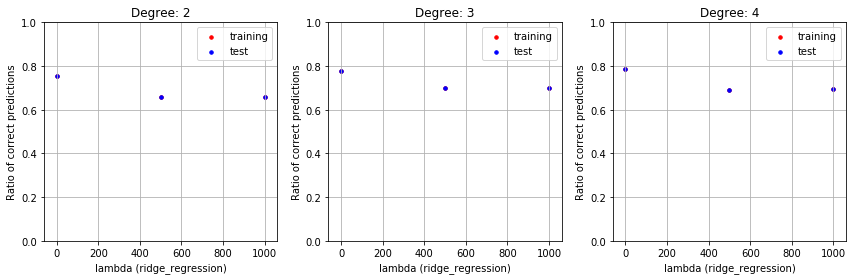

((3, 3), (3, 3))

In [17]:
# the lambda of the ridge regression does not affect mush the model
nlambdas = 3
lambdas = np.linspace(0, 1000, nlambdas)

num_K_sets = 5
degree_list = [2, 3, 4]

ratio_tr, ratio_te = cross_validation_ridge_regression(x, y, num_K_sets, degree_list, lambdas)



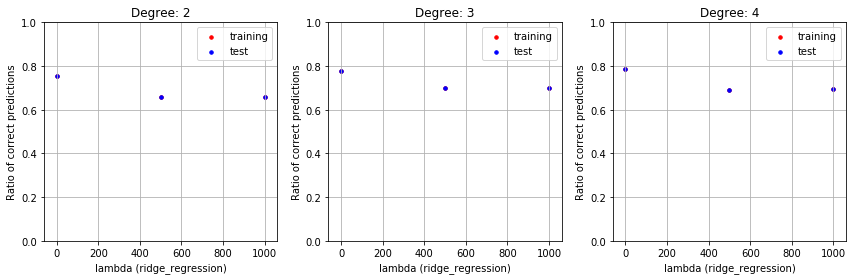

((3, 3), (3, 3))

In [18]:
# there is A LOT of data => there is no overfitting => the training error is close to the test error => it does
# not makes sense to do the cross validation (just use the whole set to train the data and compute the 
# SUCCESS_RATIO on the training data)
cross_validation_visualization(ratio_tr, ratio_te, degree_list, lambdas, "lambda (ridge_regression)")

ratio_tr.shape, ratio_te.shape

/home/niccolo/anaconda3/envs/ada/lib/python3.6/site-packages/numpy/ma/core.py:6592: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


(50000,)
(50000,)
0.6282


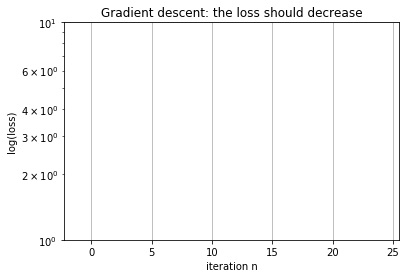

In [3]:
k_indices = build_k_indices(y, 5, 4)
tx = build_poly(x, 3) 

train, test = get_kth_set(y, tx, k_indices, 1)

initial_w = np.zeros(tx.shape[1])
max_iters = 50
gamma = 0.01

_, w = gradient_descent(test.y, test.tx, initial_w, max_iters, gamma, batch_size=-1, 
                        print_output=False, plot_losses=True, costfunc=CostFunction.MSE)
print(compute_loss(test.y, test.tx, w, costfunc=CostFunction.SUCCESS_RATIO))

In [4]:
x

array([[ 0.46141372,  0.06833197,  0.40768027, ...,  1.5668    ,
         1.55858439,  0.4125105 ],
       [ 0.51670419,  0.55250482,  0.54013641, ..., -0.63936657,
        -0.63936694, -0.27381996],
       [-2.33785898,  3.19515553,  1.09655998, ..., -0.63936657,
        -0.63936694, -0.29396985],
       ..., 
       [ 0.38016991,  0.31931645, -0.13086367, ..., -0.63936657,
        -0.63936694, -0.31701723],
       [ 0.35431502, -0.84532397, -0.30297338, ..., -0.63936657,
        -0.63936694, -0.74543941],
       [-2.33785898,  0.66533608, -0.25352276, ..., -0.63936657,
        -0.63936694, -0.74543941]])